In [1]:
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import glob
import os
from sklearn.preprocessing import LabelEncoder
import pickle
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# script_dir =os.path.dirname(os.path.realpath(__file__)) # os.path.dirname(os.path.abspath(__file__))  # <-- absolute dir the script is in
cwd = os.getcwd()
rel_path = "Sensing/Noise"

path = os.path.join(cwd, rel_path)
print("1   ",path)
all_files = glob.glob(path + "/*.csv")

print("2  ",all_files)

1    /Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Noise
2   ['/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Noise/G12.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Noise/G11.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Noise/G10.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Noise/H7.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Noise/G8.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Noise/G9.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Noise/H6.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Noise/H4.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Noise/H5.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Noise/I5.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Noise/I4.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Noise/I6.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Noise/H2.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Noise/H3.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/Nois

In [3]:
noise='/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/NOISE.csv'
dfnoise = pd.read_csv(noise, index_col=None, header=0)
dfnoise['avgX']=dfnoise['X'].rolling(window=20,min_periods=1).mean()
dfnoise['avgY']=dfnoise['Y'].rolling(window=20,min_periods=1).mean()
# print(df)
print("max=",dfnoise['Y'].max())
print("min=",dfnoise['Y'].min())
print('mean=',dfnoise['Y'].mean())


max= 2213
min= -88
mean= 1053.765037593985


In [4]:
li = []
meanOverallX=[]
meanOverallY=[]
meanOverallLabel=[]
print("Overall Mean of each section:")
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0 )
    df = df[((df['Y'] <= dfnoise['Y'].min()) | (df['Y'] >= dfnoise['Y'].max())) | ((df['X'] <= dfnoise['X'].min()) | (df['X'] >= dfnoise['X'].max()) ) ] 
    meanOverallLabel.append( df['Label'].unique())
    meanOverallX.append( df['X'].mean())
    meanOverallY.append( df['Y'].mean())
    df['meanY']=df.mean(axis = 1,skipna = True)
    df['avgX']=df['X'].rolling(window=10,min_periods=1).mean()
    df['avgY']=df['Y'].rolling(window=10,min_periods=1).mean()
    df['minX']=df['X'].rolling(window=20,min_periods=1).min()
    df['minY']=df['Y'].rolling(window=20,min_periods=1).min()
    df.dropna()
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame = frame.dropna()
frame.to_csv("data",index=False)

Overall Mean of each section:


In [5]:
labels=[]
for x in range(len(meanOverallLabel)):
#     print(meanOverallLabel[x][0])
    labels.append(meanOverallLabel[x][0])


In [6]:
# Loading scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

In [7]:
df2 = frame.sample(frac=1).reset_index(drop=True)

In [8]:
df2.head()

,X,Y,Label,meanY,avgX,avgY,minX,minY
0,1646,-2182,I9,-268.0,1062.4,-1606.4,-108.0,-2717.0
1,843,-716,H7,63.5,218.2,-431.9,-967.0,-1525.0
2,-1747,2135,G11,194.0,-430.9,1644.5,-1747.0,-97.0
3,-2331,2031,G9,-150.0,-1659.3,1596.7,-2740.0,484.0
4,1299,-2230,I11,-465.5,971.1,-1657.3,-214.0,-2843.0


In [9]:
frame.to_csv('Sensing/Noise/filtered/Frame2', sep='\t')

In [10]:
#assigning X and Y 
X = df2.drop(['Label'], axis = 1)
Y = df2['Label']

In [11]:
# X


In [12]:
# Y

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split

In [14]:
# from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
#splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state =50)

#scaling the data
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

/anaconda2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [16]:
clf=RandomForestClassifier(n_estimators=50,random_state=40)


In [17]:
#using traing set data to build the model
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [39]:
#predicting the data
y_pred=clf.predict(X_test)


In [19]:
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn import metrics
def plot_cm(X, y, clf, title, dest):

    cm = metrics.confusion_matrix(y, clf.predict(X))

    np.set_printoptions(suppress=True)
    mpl.rc("figure", figsize=(30, 30))

    hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=labels,
            xticklabels=labels,
            cmap='Blues'
            )
    plt.title(title)
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.tight_layout()
    plt.savefig(dest, dpi=1000)
    plt.show()

In [23]:
X_train.size

79758

In [24]:
X_test.size

26586

SystemError: <built-in method write of _io.FileIO object at 0x1a1b59c240> returned a result with an error set

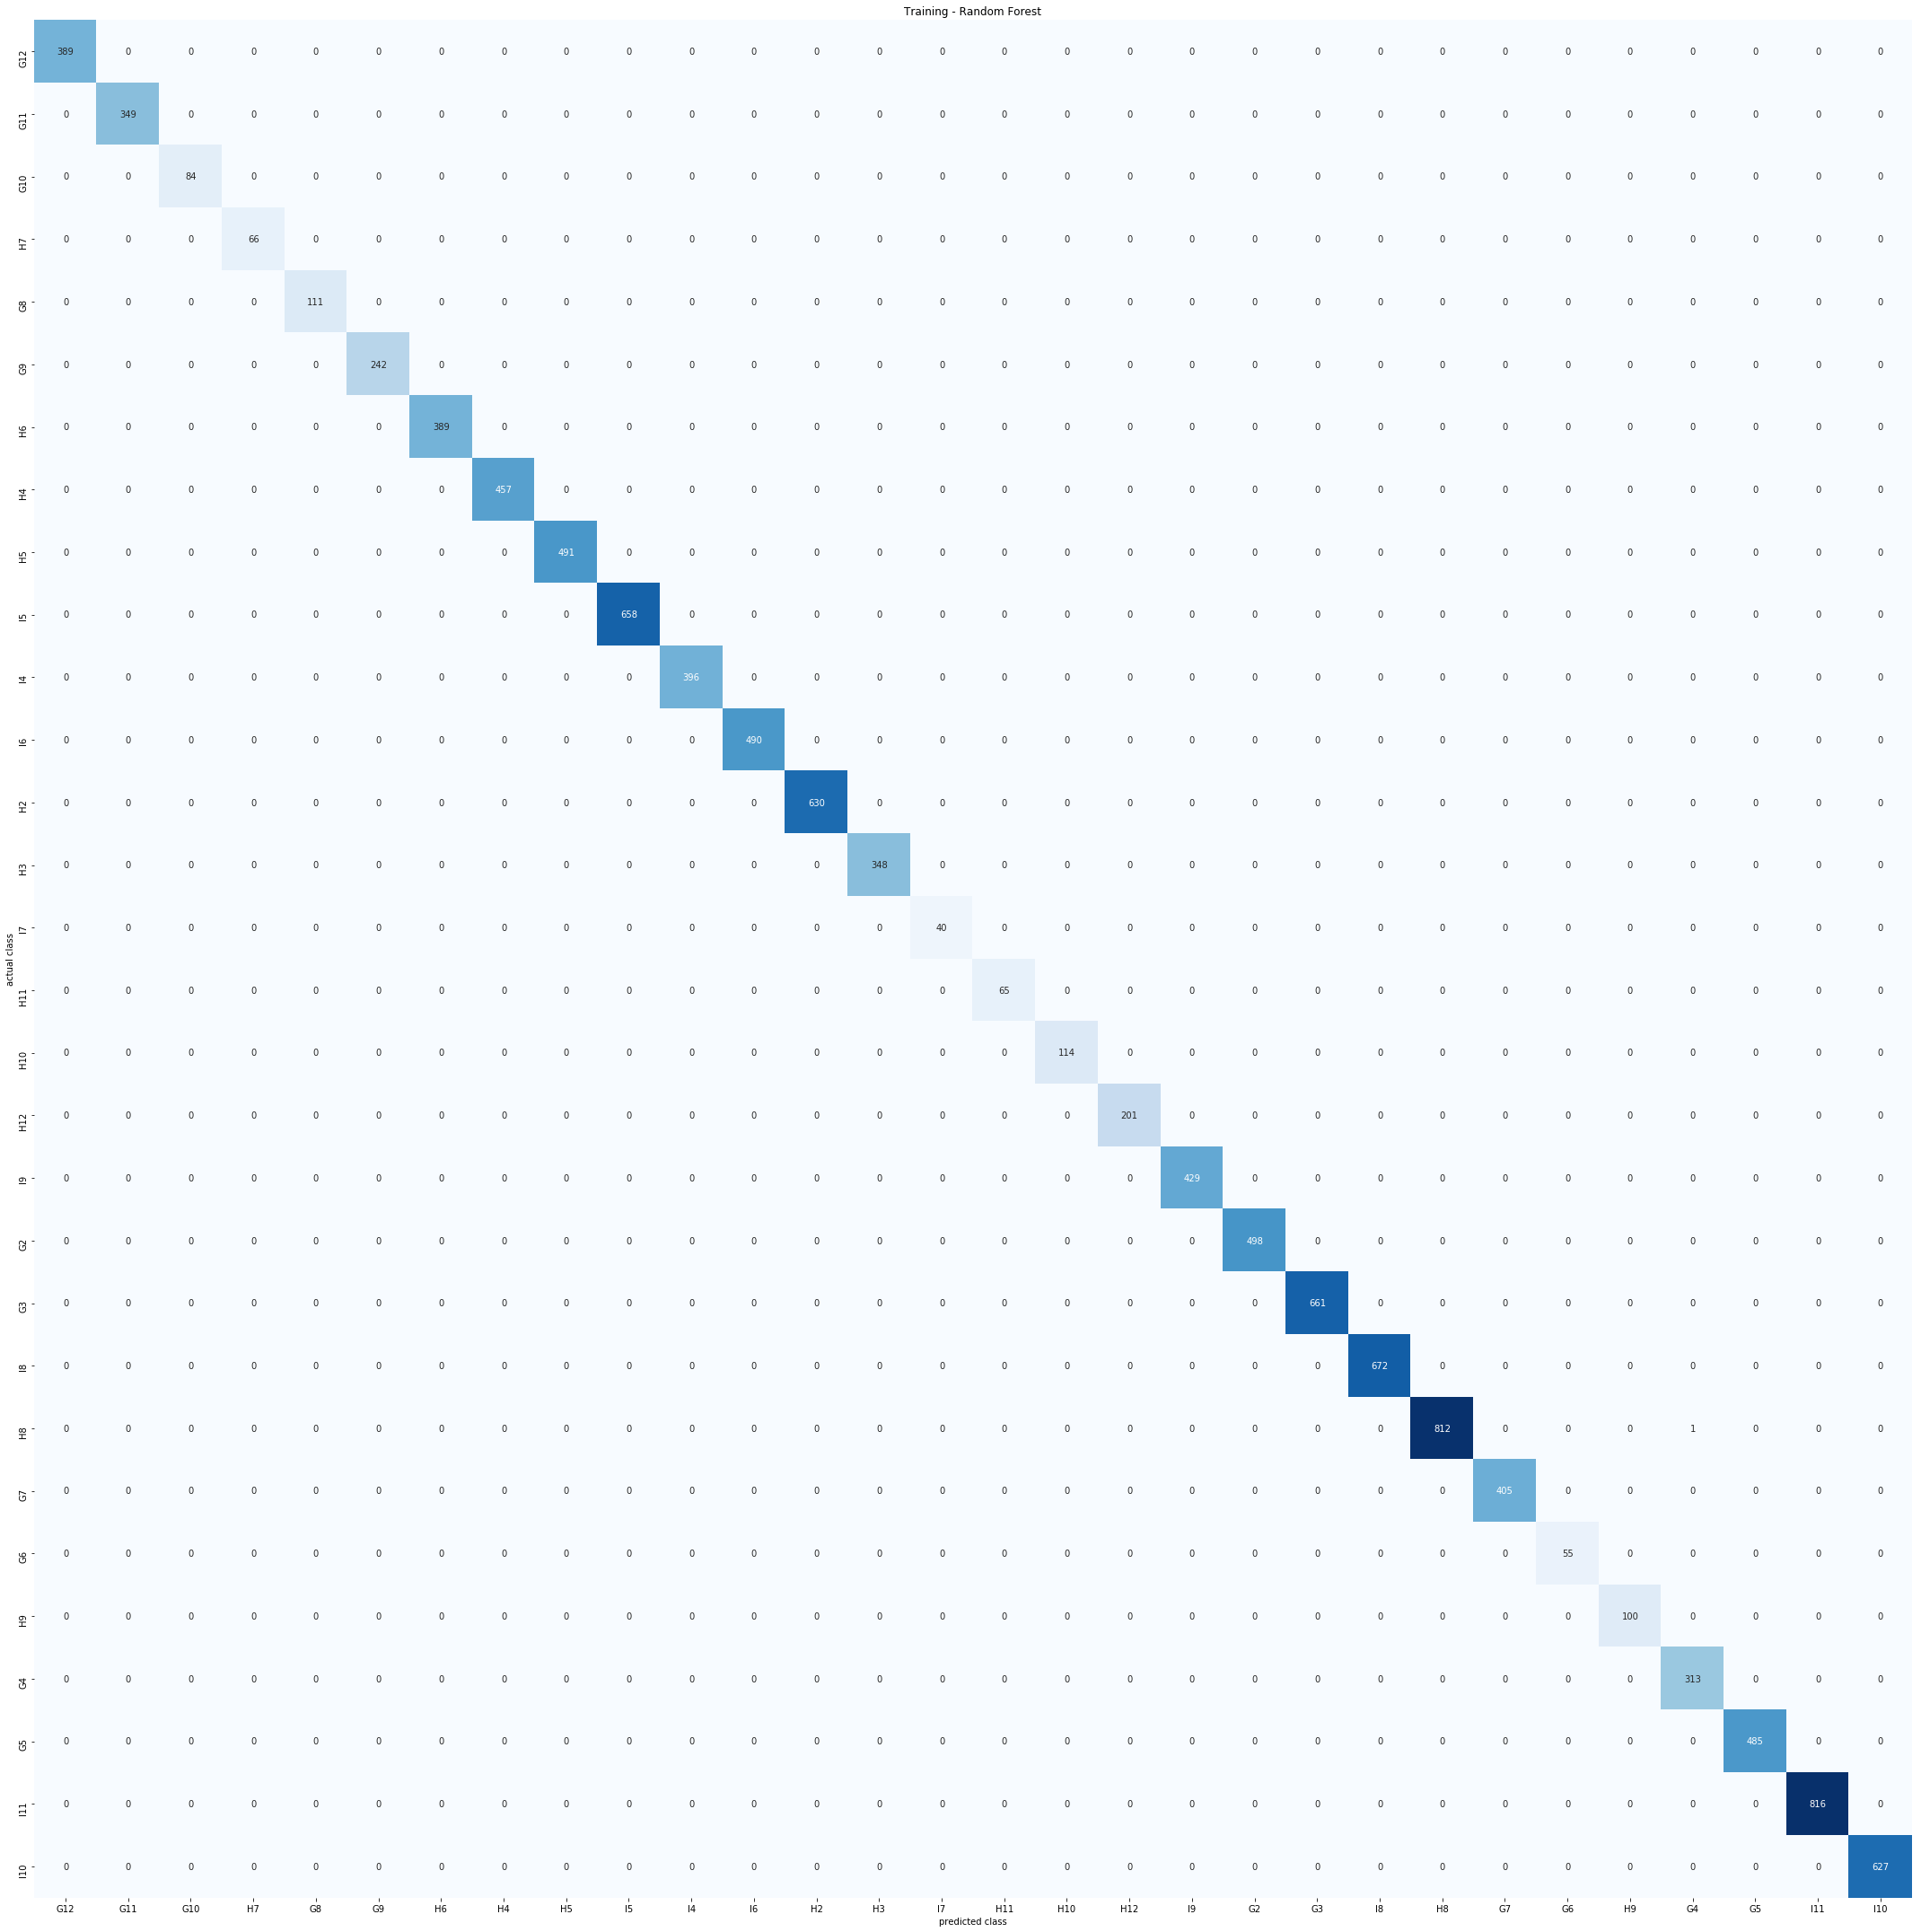

In [22]:
plot_cm(X_train, y_train, clf, 'Training - Random Forest', '../confmat_randomforesttrain.png')


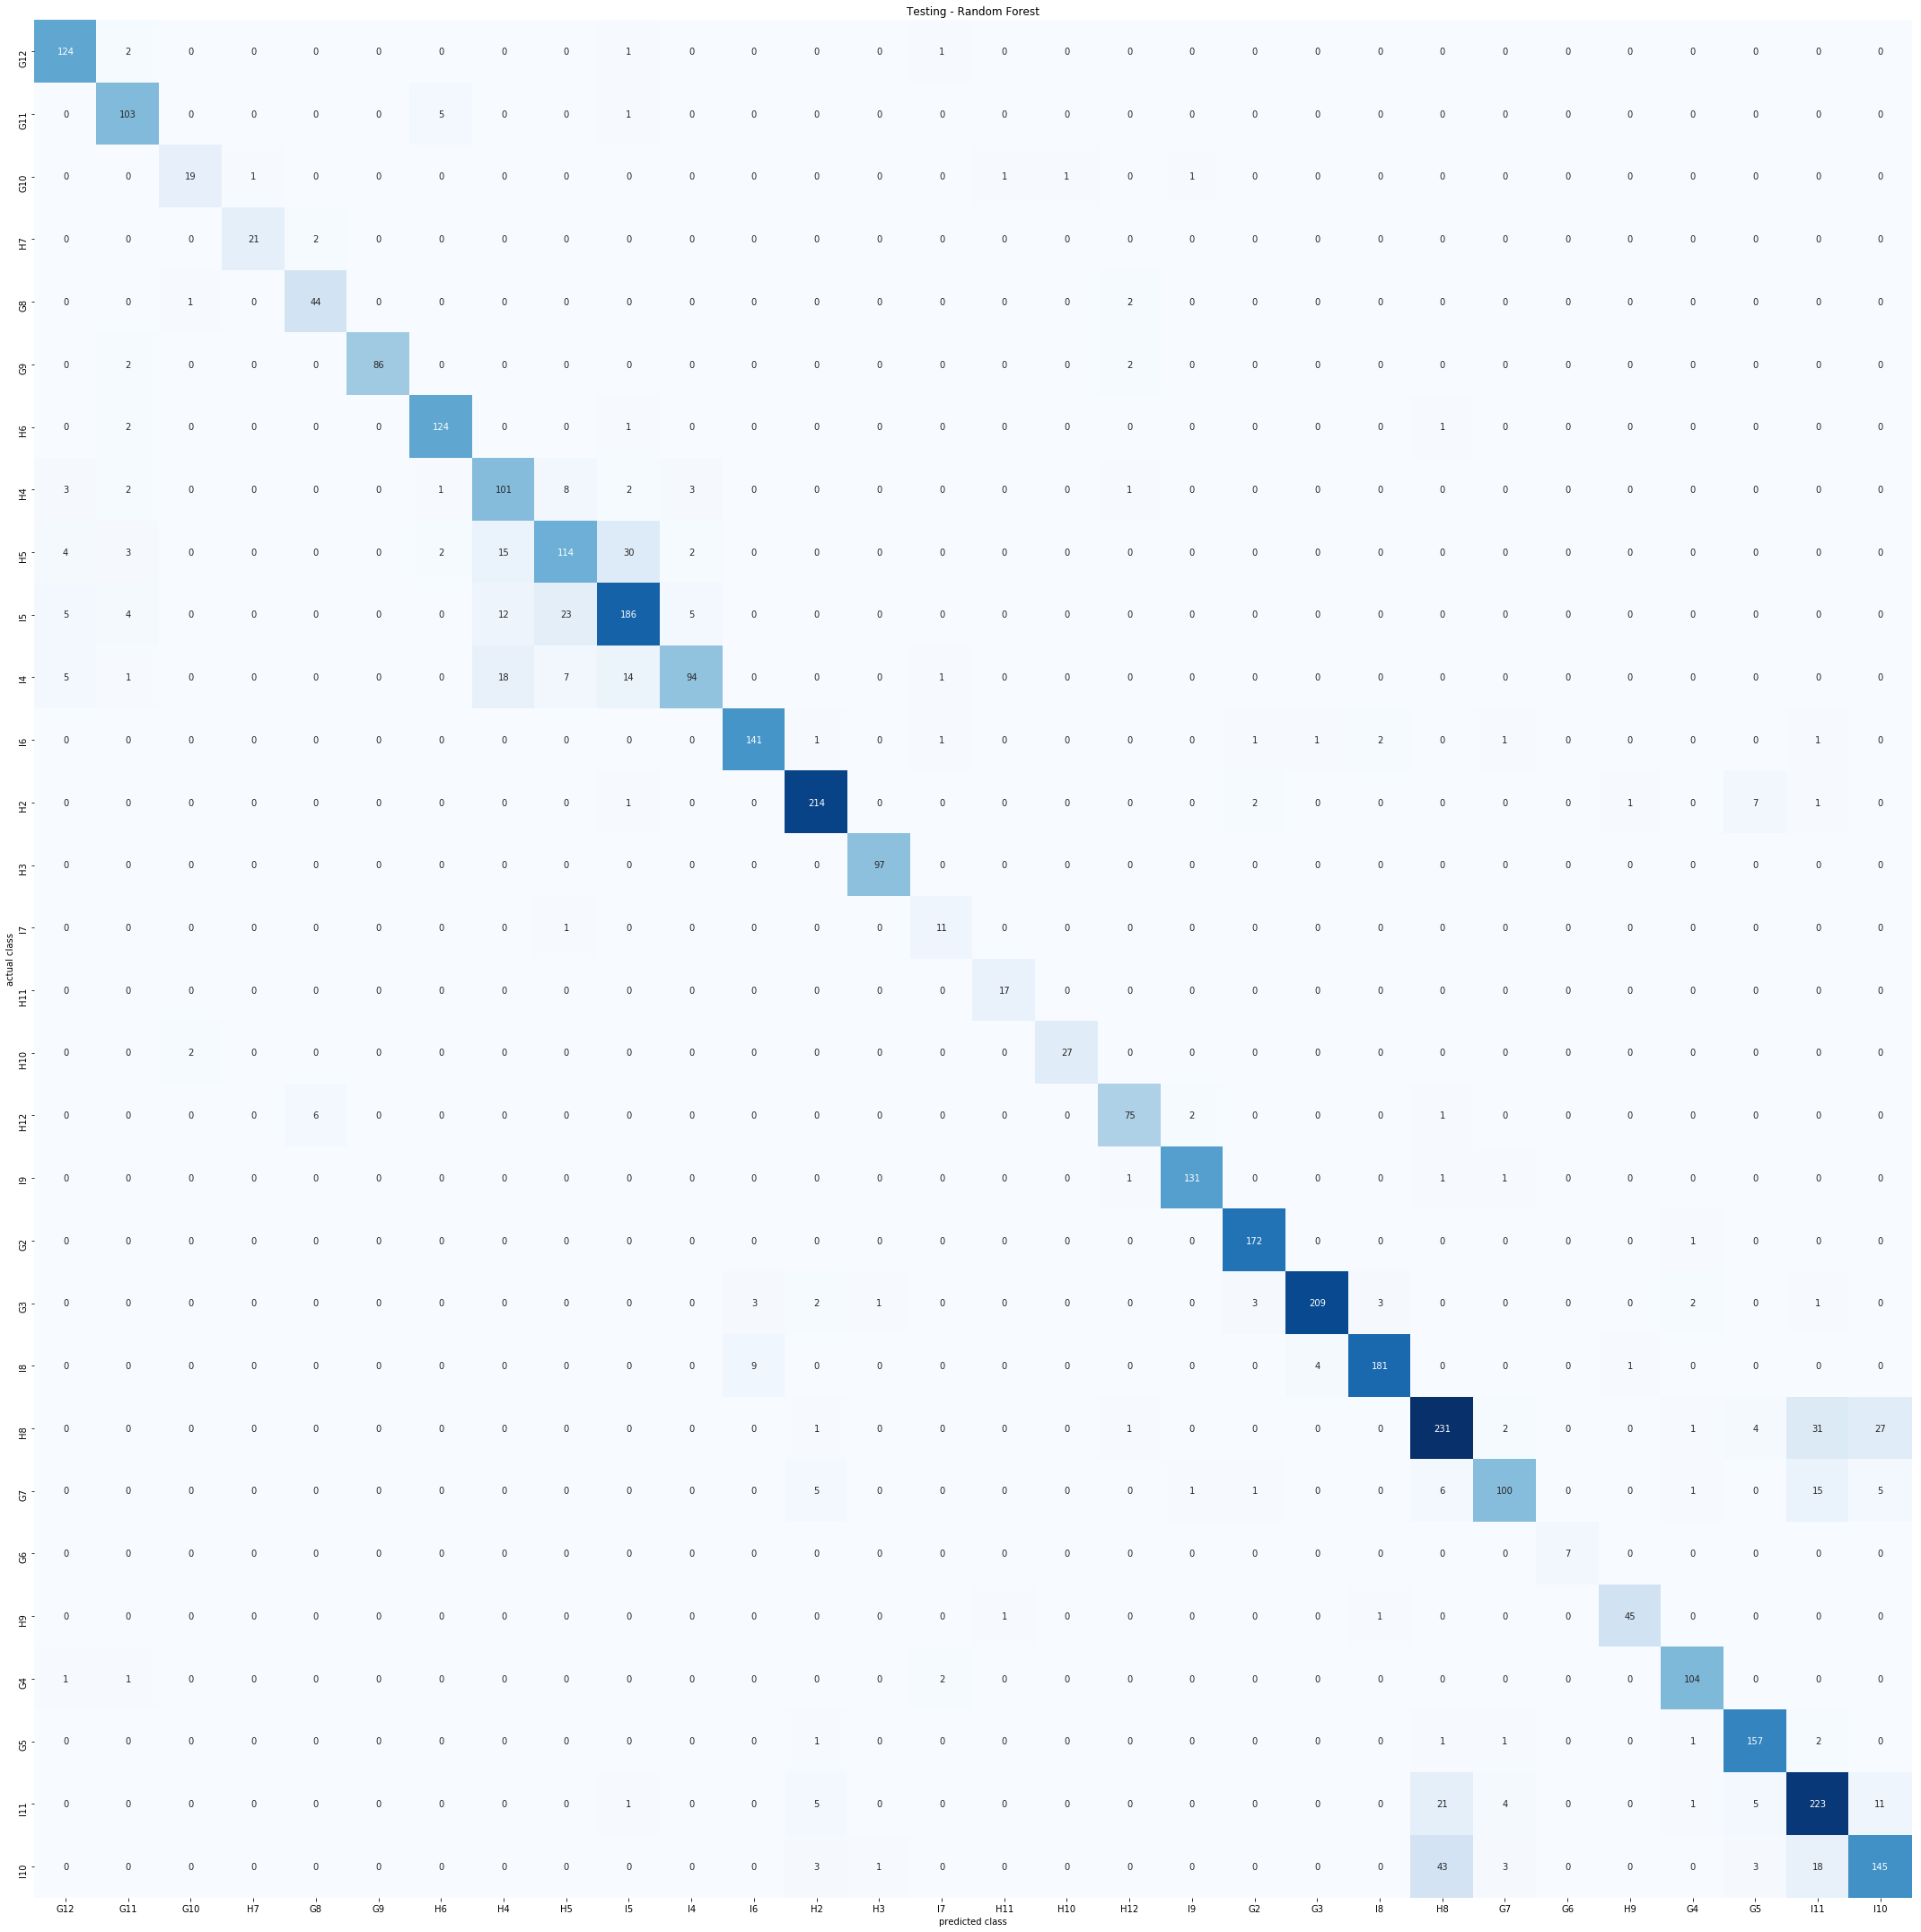

In [21]:
plot_cm(X_test, y_test, clf, 'Testing - Random Forest', '../confmat_randomforesttest.png')


In [40]:
rfacc=accuracy_score(y_test,y_pred)

In [ ]:
import seaborn as sb
#plotting the bar chart between the quality and its count
plt=sb.countplot(x='Label',data=frame)

In [26]:
from sklearn import svm

In [27]:
clf_svm = svm.SVC(gamma='scale')

In [28]:
 clf_svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
y_pred_svm=clf_svm.predict(X_test)

In [41]:
svmacc=accuracy_score(y_test,y_pred_svm)

In [31]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [32]:
y_pred_lin_clf=lin_clf.predict(X_test)

In [42]:
linsvmacc=accuracy_score(y_test,y_pred_lin_clf)

In [34]:
from sklearn.metrics import confusion_matrix 

In [35]:
results = confusion_matrix(y_test,y_pred) 

In [36]:
print(results)

[[124   2   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 103   0   0   0   0   5   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  19   1   0   0   0   0   0   0   0   0   0   0   0   1   1   0
    1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  21   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0  44   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0  86   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0 124   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   0   0   0   0   0   0]
 [  3   2   0   0   0   0   1 101   8   2   3   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0   0   0   0   0]


In [37]:

from sklearn.metrics import classification_report 
classification_report(y_test,y_pred) 

'              precision    recall  f1-score   support\n\n         G10       0.87      0.97      0.92       128\n         G11       0.86      0.94      0.90       109\n         G12       0.86      0.83      0.84        23\n          G2       0.95      0.91      0.93        23\n          G3       0.85      0.94      0.89        47\n          G4       1.00      0.96      0.98        90\n          G5       0.94      0.97      0.95       128\n          G6       0.69      0.83      0.76       121\n          G7       0.75      0.67      0.71       170\n          G8       0.78      0.79      0.79       235\n          G9       0.90      0.67      0.77       140\n         H10       0.92      0.95      0.93       149\n         H11       0.92      0.95      0.93       226\n         H12       0.98      1.00      0.99        97\n          H2       0.69      0.92      0.79        12\n          H3       0.89      1.00      0.94        17\n          H4       0.96      0.93      0.95        29\n       

In [43]:
print("Random Forest: \t", rfacc*100,"%" )
print("SVM:\t\t", svmacc*100,"%" )
print("Linear SVM:\t",linsvmacc*100,"%" )

Random Forest: 	 86.96682464454977 %
SVM:		 60.55818852027382 %
Linear SVM:	 38.599262769878884 %
